In [16]:
print("Adelson-Velsky and Landis")
from utils import draw_tree

Adelson-Velsky and Landis


In [17]:
class AvlNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # track subtree height

In [ ]:
class AvlTree:
    def __init__(self):
        self.root = None

    # ------------------ Utility Methods ------------------ #
    def _get_height(self, node):
        if node is None:
            return 0
        return node.height

    def _update_height(self, node):
        """
        Height = 1 + max height of left or right child
        """
        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))

    def _get_balance(self, node):
        """
        Balance Factor = height(node.right) - height(node.left)
        """
        if node is None:
            return 0
        return self._get_height(node.right) - self._get_height(node.left)

    def _rotate_left(self, z):
        """
        Right-heavy fix:
            z
             \
              y
        Becomes:
             y
            / \
           z   ...
        """
        y = z.right
        T2 = y.left
        # Perform rotation
        y.left = z
        z.right = T2
        # Update heights
        self._update_height(z)
        self._update_height(y)
        # Return new root
        return y

    def _rotate_right(self, z):
        """
        Left-heavy fix:
             z
            /
           y
        Becomes:
            y
             \
              z
        """
        y = z.left
        T3 = y.right
        # Perform rotation
        y.right = z
        z.left = T3
        # Update heights
        self._update_height(z)
        self._update_height(y)
        # Return new root
        return y

    def _rebalance(self, node, inserted_value=None, deleted_value=None):
        """
        Decide if node is unbalanced and fix it.
        inserted_value or deleted_value (only one is set)
        helps identify which rotation.
        """
        balance = self._get_balance(node)
        # 1. Left-Left (LL)
        if balance < -1 and (
            (inserted_value is not None and inserted_value < node.left.value)
            or (
                deleted_value is not None
                and self._get_balance(node) < -1
                and self._get_balance(node.left) <= 0
            )
        ):
            return self._rotate_right(node)
        # 2. Right-Right (RR)
        if balance > 1 and (
            (inserted_value is not None and inserted_value > node.right.value)
            or (
                deleted_value is not None
                and self._get_balance(node) > 1
                and self._get_balance(node.right) >= 0
            )
        ):
            return self._rotate_left(node)
        # 3. Left-Right (LR)
        if balance < -1 and (
            (inserted_value is not None and inserted_value > node.left.value)
            or (
                deleted_value is not None
                and self._get_balance(node) < -1
                and self._get_balance(node.left) > 0
            )
        ):
            node.left = self._rotate_left(node.left)
            return self._rotate_right(node)
        # 4. Right-Left (RL)
        if balance > 1 and (
            (inserted_value is not None and inserted_value < node.right.value)
            or (
                deleted_value is not None
                and self._get_balance(node) > 1
                and self._get_balance(node.right) < 0
            )
        ):
            node.right = self._rotate_right(node.right)
            return self._rotate_left(node)
        return node

    def _insert_recursive(self, node, value):
        if node is None:
            return AvlNode(value)
        if value < node.value:
            node.left = self._insert_recursive(node.left, value)
        else:
            node.right = self._insert_recursive(node.right, value)
        # Update height and balance
        self._update_height(node)
        return self._rebalance(node, inserted_value=value)

    def _find_min(self, node):
        """
        Get the minimum node from 'node' subtree
        by going left till left is None.
        """
        current = node
        while current.left is not None:
            current = current.left
        return current

    def _delete_recursive(self, node, value):
        if node is None:
            return node  # not found, do nothing
        # Standard BST deletion approach
        if value < node.value:
            node.left = self._delete_recursive(node.left, value)
        elif value > node.value:
            node.right = self._delete_recursive(node.right, value)
        else:
            # We found the node to delete
            if node.left is None and node.right is None:
                node = None  # Case 1: leaf
            elif node.left is None:
                node = node.right  # Case 2: one child (right)
            elif node.right is None:
                node = node.left  # Case 2: one child (left)
            else:
                # Case 3: two children
                # Find the in-order successor (smallest in right subtree)
                successor = self._find_min(node.right)
                node.value = successor.value
                # Remove the successor
                node.right = self._delete_recursive(node.right, successor.value)
        # If node is None after deletion, return
        if node is None:
            return node
        # Update height
        self._update_height(node)
        # Rebalance
        return self._rebalance(node, deleted_value=value)

    # ------------------ Insert ------------------ #
    def insert(self, value):
        self.root = self._insert_recursive(self.root, value)

    # ------------------ Delete ------------------ #
    def delete(self, value):
        self.root = self._delete_recursive(self.root, value)

    # ------------------ Search ------------------ #
    def search(self, value):
        """
        Search for 'value' starting from the root.
        Return True if found, False otherwise.
        """
        current = self.root
        while current is not None:
            if value == current.value:
                return True
            elif value < current.value:
                current = current.left
            else:
                current = current.right
        return False

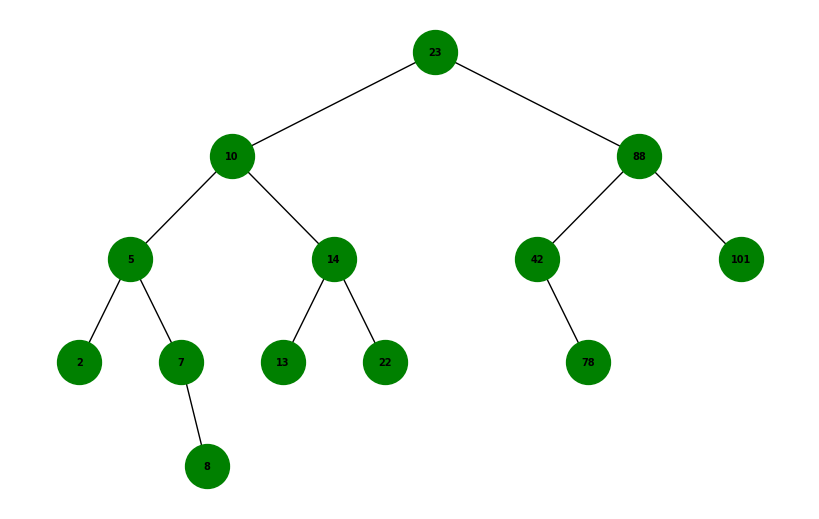

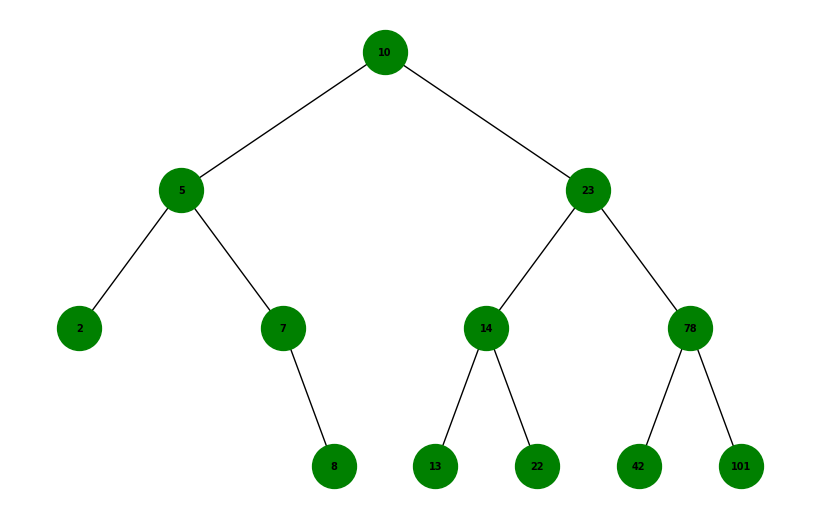

In [28]:
avl = AvlTree()

avl.insert(10)
avl.insert(7)
avl.insert(5)
avl.insert(23)
avl.insert(22)
avl.insert(13)
avl.insert(101)
avl.insert(88)
avl.insert(42)
avl.insert(78)
avl.insert(2)
avl.insert(8)
avl.insert(14)
draw_tree(avl)

avl.delete(88)

draw_tree(avl)

In [ ]:
my_d = {
    1: True,
    3: False,
    15: True,
    23: False,
}

print(my_d)

{1: True, 3: False, 15: True, 23: False}
